In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
null = None

In [2]:
kid_info = pd.read_csv("kid_info.csv")

In [3]:
kid_info = kid_info[['UserID','Condition','Gender','Improvement','Adjusted Improvement']]

In [4]:
kid_info = kid_info[(kid_info['Condition'] =='Pilot D') | (kid_info['Condition'] =='Online D')]

In [14]:
kid_info 

,UserID,Condition,Gender,Improvement,Adjusted Improvement
2,15.0,Pilot D,girl,1,--
4,21.0,Pilot D,boy,0,1
5,22.0,Pilot D,boy,-1,1
7,29.0,Pilot D,girl,2,2
8,32.0,Pilot D,boy,-1,0
9,33.0,Pilot D,boy,0,0
10,34.0,Pilot D,girl,4,3
11,36.0,Online D,girl,1,1
12,38.0,Pilot D,girl,0,0
15,44.0,Online D,boy,1,1


In [15]:
student_list = kid_info['UserID'].tolist()
student_list = list(np.array(student_list).astype(int))
kid_info['UserID'] = student_list

In [16]:
kid_info 

,UserID,Condition,Gender,Improvement,Adjusted Improvement
2,15,Pilot D,girl,1,--
4,21,Pilot D,boy,0,1
5,22,Pilot D,boy,-1,1
7,29,Pilot D,girl,2,2
8,32,Pilot D,boy,-1,0
9,33,Pilot D,boy,0,0
10,34,Pilot D,girl,4,3
11,36,Online D,girl,1,1
12,38,Pilot D,girl,0,0
15,44,Online D,boy,1,1


In [88]:
# data['data']['response']

In [89]:
# data['data']['event']

In [90]:
df_response = pd.DataFrame.from_dict(data['data']['response'] )
df_event = pd.DataFrame.from_dict(data['data']['event'] )

TypeError: string indices must be integers

In [91]:
df_event

,page,data,user_id
0,/,"{""time"":4.233}",26
1,/progress?start=true,"{""time"":1.615}",26
2,/login/eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9.ey...,"{""time"":0.005}",30
3,/progress?start=true,"{""time"":0.752}",30
4,/tutorial,"{""time"":15.516}",30
...,...,...,...
2447,/story/5,"{""time"":1.956}",61
2448,/summary,"{""time"":1.697}",61
2449,/progress?halfway=true,"{""time"":3.549}",61
2450,/story/4,"{""time"":12.703}",61


In [12]:
df_response.to_csv('database_response.csv',index=False)
df_event.to_csv('database_event.csv',index=False)

In [17]:
student_list

[15, 21, 22, 29, 32, 33, 34, 36, 38, 44]

In [121]:
hint_counter = {}
nothing_counter = {}
encourage_counter = {}
question_counter = {}
mistake_counter={}
for user_id in student_list:
    hint_counter[user_id] = 0
    encourage_counter[user_id] = 0
    nothing_counter[user_id] = 0
    question_counter[user_id] = 0
    mistake_counter[user_id] = 0

In [122]:
temp=set()
for i, j in df_response.iterrows(): 
    user_id = j['output_message']['to']
    if user_id in student_list:
        step_id = j['hint']['step_id']
        if step_id <10:
            hint_counter[user_id] += 1
        elif step_id == 13:
            nothing_counter[user_id] += 1
        elif step_id == 15:
            encourage_counter[user_id] += 1
        elif step_id == 16:
            question_counter[user_id] += 1
            
#     if j['hint']==None:
#         temp.add(user_id)
# print(temp)

In [123]:
df_new_event = pd.DataFrame(columns = df_event.columns) 
count = 0
for i, j in df_event.iterrows(): 
    user_id = j['user_id']
    data = j['data']
    page = j['page']
    

    if (user_id in student_list) and ('task' in page):
        if '1' not in page and '2' not in page and 'time' not in data:
            
            new_row = {'page':page, 'data':data, 'user_id':user_id}
    #         print(new_row)
            df_new_event = df_new_event.append(new_row, ignore_index=True)
  
            
        

In [129]:

for user_id in student_list:
    single_df = df_new_event[df_new_event['user_id'] == user_id]
    single_df = single_df.sort_values(by='page')
#     if user_id == 15:
    for i, j in single_df.iterrows(): 
        if '3' in j['page'] and '"height":4' not in  j['data'] :
            mistake_counter[user_id] += 1
            
        if '4' in j['page'] and'"width":5' not in  j['data'] :
            mistake_counter[user_id] += 1
       
        if '5' in j['page'] and'"length":6' not in  j['data'] :
            mistake_counter[user_id] += 1
           
        if '6' in j['page'] and'"total":90' not in  j['data'] :
            mistake_counter[user_id] += 1
       
        if '7' in j['page'] and'"weight":180' not in  j['data'] :
            mistake_counter[user_id] += 1
     
        if '8' in j['page'] and'"yes":true' not in  j['data'] :
            mistake_counter[user_id] += 1
           


In [130]:
single_df

,page,data,user_id
82,/tasks/3,"{""height"":20}",38
94,/tasks/3,"{""height"":3}",38
93,/tasks/3,"{""height"":1}",38
92,/tasks/3,"{""height"":0}",38
91,/tasks/3,"{""height"":4}",38
90,/tasks/3,"{""height"":6}",38
89,/tasks/3,"{""height"":10}",38
95,/tasks/3,"{""height"":3}",38
87,/tasks/3,"{""height"":4}",38
86,/tasks/3,"{""height"":8}",38


In [125]:
mistake_counter

{15: 3, 21: 4, 22: 6, 29: 3, 32: 4, 33: 2, 34: 5, 36: 4, 38: 21, 44: 18}

In [126]:
hint_count = []
nothing_count = []
question_count = []
encourage_count = []
mistake_count = []
for user_id in student_list:
    hint_count.append(hint_counter[user_id])
    encourage_count.append(encourage_counter[user_id])
    question_count.append(question_counter[user_id])
    nothing_count.append(nothing_counter[user_id])
    mistake_count.append(mistake_counter[user_id])


In [127]:
kid_info['mistake_count'] = mistake_count
kid_info['hint_count'] = hint_count
kid_info['encourage_count'] = encourage_count
kid_info['question_count'] = question_count
kid_info['nothing_count'] = nothing_count

In [128]:
kid_info = kid_info.sort_values(by=['hint_count'])
improvement = kid_info['Improvement'].tolist()
adimprovement = kid_info['Adjusted Improvement'].tolist()
hint_count = kid_info['hint_count'].tolist()
kid_info

,UserID,Condition,Gender,Improvement,Adjusted Improvement,mistake_count,hint_count,encourage_count,question_count,nothing_count
4,21,Pilot D,boy,0,1,4,0,0,0,0
5,22,Pilot D,boy,-1,1,6,0,0,0,0
9,33,Pilot D,boy,0,0,2,0,0,0,1
10,34,Pilot D,girl,4,3,5,0,0,0,0
8,32,Pilot D,boy,-1,0,4,1,0,0,0
11,36,Online D,girl,1,1,4,1,0,0,1
2,15,Pilot D,girl,1,--,3,2,0,0,0
7,29,Pilot D,girl,2,2,3,3,0,0,0
12,38,Pilot D,girl,0,0,21,4,0,2,2
15,44,Online D,boy,1,1,18,4,0,1,2


Text(0.5, 0, 'hint count')

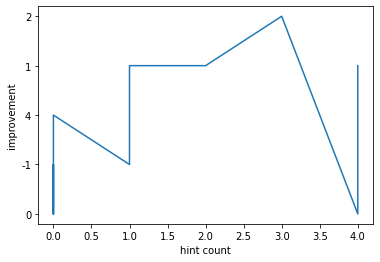

In [44]:
plt.plot(hint_count,improvement)
plt.ylabel("improvement")
plt.xlabel("hint count")

Text(0.5, 0, 'hint count')

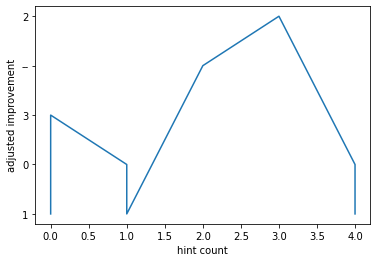

In [46]:
plt.plot(hint_count,adimprovement)
plt.ylabel("adjusted improvement")
plt.xlabel("hint count")